In [6]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ht = model.fit(x_train, y_train, batch_size= 64, epochs=5 ,verbose=2 , validation_data= (x_test, y_test))

Epoch 1/5
938/938 - 5s - loss: 0.1476 - accuracy: 0.9555 - val_loss: 0.0678 - val_accuracy: 0.9792
Epoch 2/5
938/938 - 4s - loss: 0.0433 - accuracy: 0.9871 - val_loss: 0.0506 - val_accuracy: 0.9823
Epoch 3/5
938/938 - 4s - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0506 - val_accuracy: 0.9832
Epoch 4/5
938/938 - 4s - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0534 - val_accuracy: 0.9837
Epoch 5/5
938/938 - 4s - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0533 - val_accuracy: 0.9846


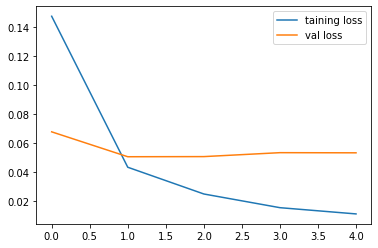

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.figure()
plt.plot(np.arange(0,5,), ht.history['loss'], label='taining loss')
plt.plot(np.arange(0,5,), ht.history['val_loss'], label='val loss')
plt.legend(loc='upper right')
plt.show()

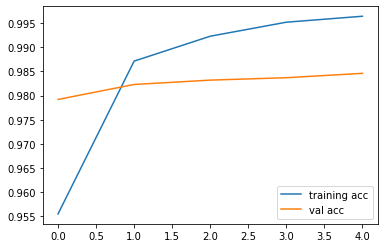

In [8]:
plt.figure()
plt.plot(np.arange(0,5,), ht.history['accuracy'], label='training acc')
plt.plot(np.arange(0,5,), ht.history['val_accuracy'], label='val acc')
plt.legend(loc='lower right')
plt.show()